In [18]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [19]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [20]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(y_test.shape))

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [21]:
def showImage(image_arr, index):
    first_image = np.array(image_arr[index], dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [22]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


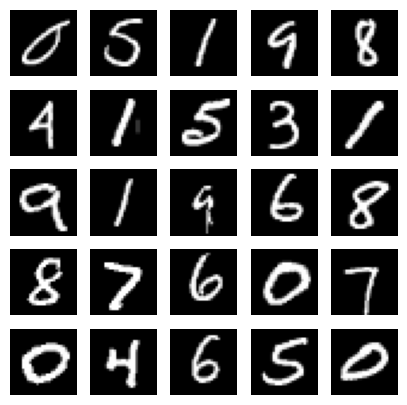

In [23]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, X_train.shape[0], size=25)
images = X_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [24]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [25]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [26]:
# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size
input_size

784

In [27]:
# resize and normalize
x_train = np.reshape(X_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(X_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [28]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [29]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('sigmoid'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [32]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [34]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 10s 16ms/step - loss: 0.4300 - accuracy: 0.8679
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1961 - accuracy: 0.9412
Epoch 3/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1524 - accuracy: 0.9543
Epoch 4/20
469/469 [==============================] - 7s 16ms/step - loss: 0.1290 - accuracy: 0.9616
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.1166 - accuracy: 0.9643
Epoch 6/20
469/469 [==============================] - 8s 16ms/step - loss: 0.1035 - accuracy: 0.9680
Epoch 7/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0932 - accuracy: 0.9707
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0894 - accuracy: 0.9728
Epoch 9/20
469/469 [==============================] - 8s 16ms/step - loss: 0.0824 - accuracy: 0.9741
Epoch 10/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0775 - accur

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))